***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
df = pd.read_csv("dados.csv")

### Visualize o conteúdo do DataFrame

In [3]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [17]:
classes = [0, 788*2, 788*5, 788*15, 788*25, 20000]

### 2º Definir os labels das classes

In [18]:
labels = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [24]:
frequencias = pd.value_counts(pd.cut(x=df.Renda, bins=classes, labels=labels, include_lowest=True))

### 4º Construir a coluna de percentuais

In [25]:
percentual = pd.value_counts(pd.cut(x=df.Renda, bins=classes, labels=labels, include_lowest=True), normalize=True)*100

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [26]:
dist_frequencia_quantitativa = pd.DataFrame({"Frequencias":frequencias, "Percentual%":percentual})
dist_frequencia_quantitativa.sort_index(ascending=False)

,Frequencias,Percentual%
A,161,0.210235
B,822,1.073373
C,7241,9.455348
D,18602,24.290620
E,49755,64.970423


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

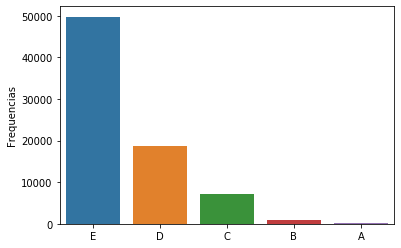

In [32]:
ax = sns.barplot(x=dist_frequencia_quantitativa.index, y=dist_frequencia_quantitativa.Frequencias, data=dist_frequencia_quantitativa)

> ### Conclusões

Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

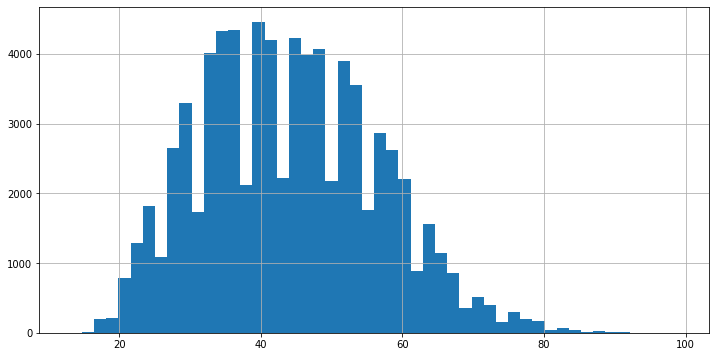

In [34]:
df.Idade.hist(bins=50, figsize=(12,6))

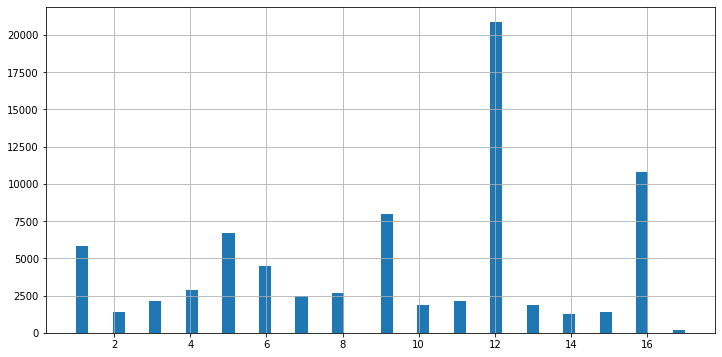

In [35]:
df["Anos de Estudo"].hist(bins=50, figsize=(12,6))

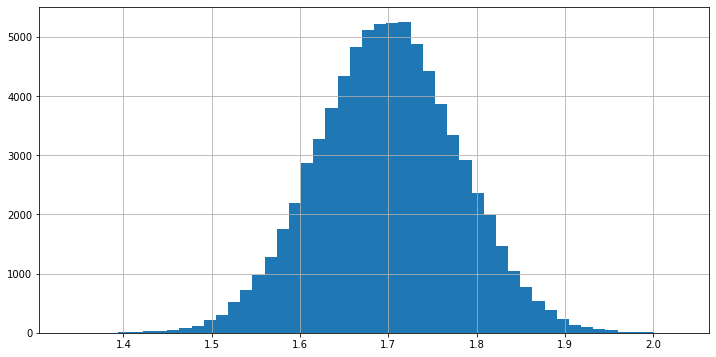

In [36]:
df["Altura"].hist(bins=50, figsize=(12,6))

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

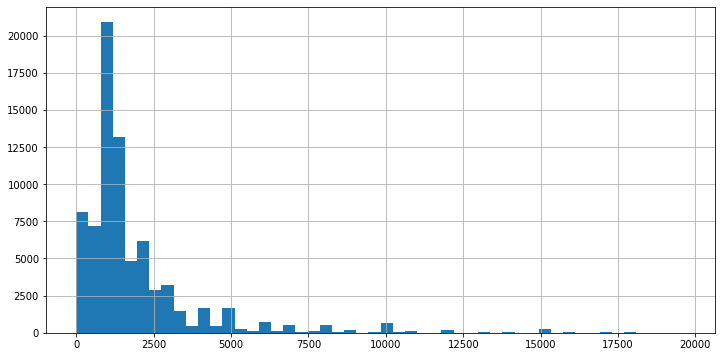

In [41]:
df.query("Renda < 20000").Renda.hist(bins=50, figsize=(12,6))

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [43]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [48]:
frequencia = pd.crosstab(df.Cor, df.UF)
frequencia.rename(index=cor, columns=uf, inplace=True)

In [49]:
frequencia

UF,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Cor,,,,,,,,,,,,,,,,,,,,,
Indígena,3,27,58,20,44,1,0,9,1,14,...,5,12,27,6,5,27,7,6,5,4
Branca,492,190,343,96,790,104,312,343,233,879,...,641,2488,5047,2966,1930,5083,639,614,1283,861
Preta,165,92,123,61,466,50,164,269,151,186,...,181,927,705,193,52,444,82,168,327,233
Amarela,9,2,6,1,14,3,4,1,0,12,...,1,19,120,53,3,9,14,8,31,12
Parda,868,626,1676,362,3135,354,826,1165,826,2268,...,683,2110,2645,1138,285,759,698,1004,1832,944


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [50]:
df.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [51]:
df.Renda.median()

1200.0

### Obtenha a moda

In [52]:
df.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [53]:
df.Renda.mad()

1526.4951371638058

### Obtenha a variância

In [54]:
df.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [55]:
df.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [59]:
media_sexo = df.groupby("Sexo").agg("mean").Renda
mediana_sexo = df.groupby("Sexo").agg("median").Renda
_max_sexo = df.groupby("Sexo").agg("max").Renda

# print(media_sexo, mediana_sexo, _max_sexo)

media_cor = df.groupby("Cor").agg("mean").Renda
mediana_cor = df.groupby("Cor").agg("median").Renda
_max_cor = df.groupby("Cor").agg("max").Renda

print(media_cor, mediana_cor, _max_cor)

Cor
0    1472.887955
2    2679.019331
4    1442.294840
6    4182.920455
8    1513.596103
Name: Renda, dtype: float64 Cor
0     788
2    1500
4    1000
6    2450
8    1000
Name: Renda, dtype: int64 Cor
0    120000
2    200000
4     50000
6     50000
8    100000
Name: Renda, dtype: int64


> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [61]:
mad_sexo = df.groupby("Sexo").agg("mad").Renda
var_sexo = df.groupby("Sexo").agg("var").Renda
std_sexo = df.groupby("Sexo").agg("std").Renda

# print(media_sexo, mediana_sexo, _max_sexo)

mad_cor = df.groupby("Cor").agg("mad").Renda
var_cor = df.groupby("Cor").agg("var").Renda
std_cor = df.groupby("Cor").agg("std").Renda

print(mad_cor, var_cor, std_cor)

Cor
0    1353.145792
2    2103.131290
4     906.507603
6    3385.914062
8    1046.887002
Name: Renda, dtype: float64 Cor
0    4.159087e+07
2    1.908087e+07
4    3.135141e+06
6    2.723900e+07
8    4.548909e+06
Name: Renda, dtype: float64 Cor
0    6449.098217
2    4368.165306
4    1770.632912
6    5219.099832
8    2132.817184
Name: Renda, dtype: float64


> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Text(0.5, 0, 'Valor')

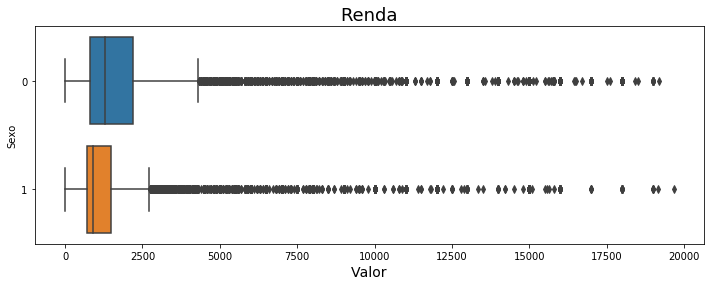

In [72]:
# df.query("Sexo == 0")
ax = sns.boxplot(x="Renda", y="Sexo", data=df.query("Renda < 20000"), orient="h")
ax.figure.set_size_inches(12,4)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("Valor", fontsize=14)

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [81]:
from scipy import stats
stats.percentileofscore([0,1,2,3,788], 788)
df.query("Renda <= 788").count()[0]/df.count()[0]
# 72%

0.2886777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [87]:

ran = [i/100 for i in range(1, 100)]
df.Renda.quantile(ran)
# 15000

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [98]:
percentual = pd.crosstab(df.Sexo, df["Anos de Estudo"], aggfunc='mean', values=df.Renda)
percentual.rename(index=sexo, inplace=True)
percentual

Anos de Estudo,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Sexo,,,,,,,,,,,,,,,,,
Masculino,799.494638,895.629047,931.178986,1109.203862,1302.329283,1338.653218,1448.875419,1465.497940,1639.396667,1508.03885,1731.270847,2117.060504,2470.330776,3195.099154,3706.620269,6134.279790,1295.761905
Feminino,516.201748,492.771987,529.911638,546.853916,704.279111,781.389776,833.732824,830.751004,933.615351,868.02170,925.919225,1286.790889,1682.313725,1911.730047,2226.460457,3899.513231,798.174419


### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Text(0.5, 0, 'Valor')

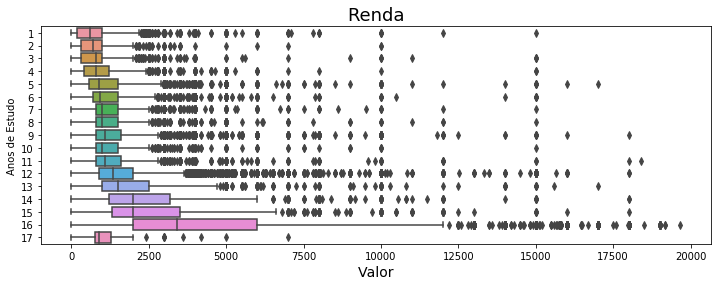

In [100]:
# df.query("Sexo == 0")
ax = sns.boxplot(x="Renda", y="Anos de Estudo", data=df.query("Renda < 20000"), orient="h")
ax.figure.set_size_inches(12,4)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("Valor", fontsize=14)

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [101]:
mad_uf = df.groupby("UF").agg("mad").Renda
var_uf = df.groupby("UF").agg("var").Renda
std_uf = df.groupby("UF").agg("std").Renda

print(mad_uf, var_uf, std_uf)

UF
11    1169.626721
12    1150.422587
13    1028.809304
14    1304.441235
15     999.540254
16    1248.689445
17    1402.198504
21     897.489733
22     963.285816
23     952.410033
24     990.469976
25    1049.734403
26    1163.981389
27     748.921157
28     832.634033
29    1122.707117
31    1582.955568
32    1412.212549
33    1937.142675
35    1872.961287
41    1774.665440
42    1519.223781
43    1652.103713
50    1623.581510
51    1376.571790
52    1231.936851
53    3555.523970
Name: Renda, dtype: float64 UF
11    5.789612e+06
12    5.181239e+06
13    3.090338e+06
14    4.324983e+06
15    4.218010e+06
16    4.083183e+06
17    8.611823e+06
21    3.563853e+06
22    5.632817e+06
23    3.319551e+06
24    2.728461e+06
25    3.803563e+06
26    5.710296e+06
27    1.532288e+06
28    2.187435e+06
29    1.230548e+07
31    1.285023e+07
32    1.234712e+07
33    2.719188e+07
35    1.227646e+07
41    1.851528e+07
42    9.844854e+06
43    8.487525e+06
50    9.189502e+06
51    6.464968e+06
52   

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

Text(0.5, 0, 'Valor')

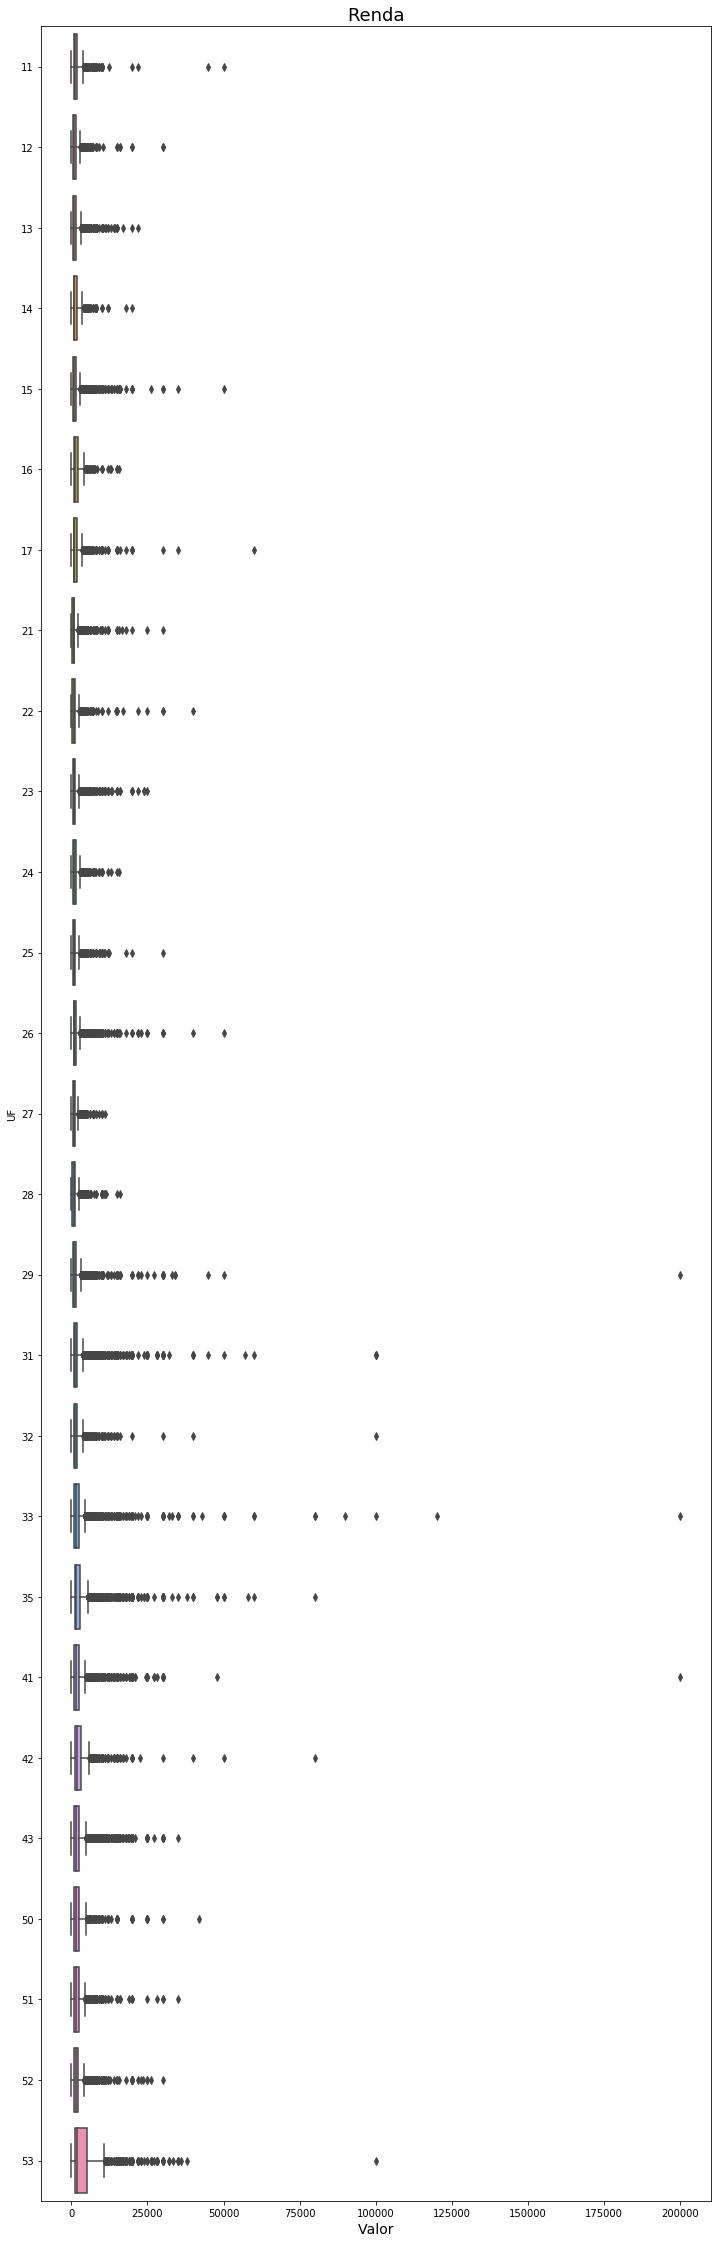

In [105]:
# df.query("Sexo == 0")
ax = sns.boxplot(x="Renda", y="UF", data=df, orient="h")
ax.figure.set_size_inches(12,40)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("Valor", fontsize=14)

> ### Conclusões

Escreva suas conclusões aqui...

Text(0.5, 0, 'Valor')

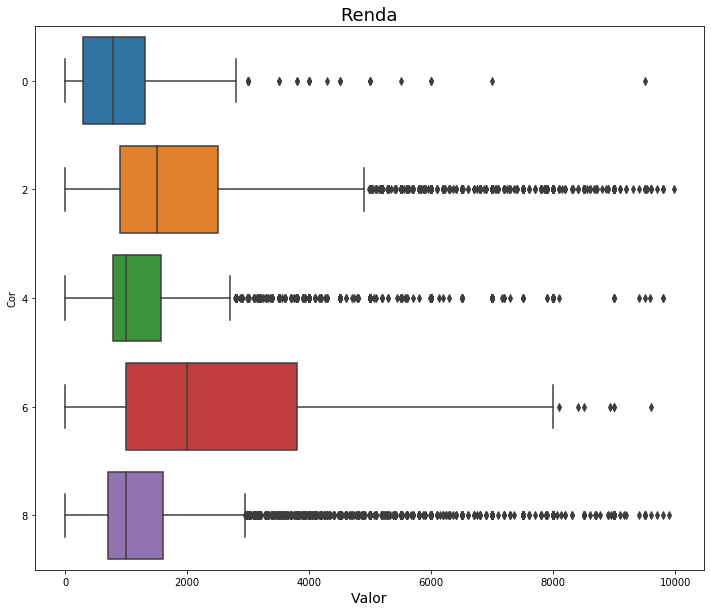

In [108]:
# df.query("Sexo == 0")
ax = sns.boxplot(x="Renda", y="Cor", data=df.query("Renda < 10000"), orient="h")
ax.figure.set_size_inches(12,10)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("Valor", fontsize=14)

In [113]:
percentil = stats.percentileofscore(df.Renda, 788, kind='weak')
print("{0:.2f}%".format(percentil))

28.87%


In [114]:
valor = df.Renda.quantile(.99)
valor

15000.0